# Loading dataset

Taxi Data from TLC for the year 2023 January: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page and to get the specific location of the IDs the taxi zone values from: https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc

In [1]:
import pandas as pd

trip_data = pd.read_parquet('yellow_tripdata_2023-01.parquet', engine='pyarrow')
taxi_zones = pd.read_csv('taxi_zones.csv')

# View the data

In [2]:
trip_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
taxi_zones.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


# Merging data 

Merging data of both dataframes with respect to the LocationID and the zone and borough

In [4]:
merged_df = trip_data.merge(taxi_zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')
merged_df.rename(columns={'zone': 'PUzone', 'borough': 'PUborough'}, inplace=True)
merged_df = merged_df.merge(taxi_zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')
merged_df.rename(columns={'zone': 'DOzone', 'borough': 'DOborough'}, inplace=True)
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,LocationID_x,PUzone,PUborough,LocationID_y,DOzone,DOborough
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.0,14.30,2.5,0.00,161.0,Midtown Center,Manhattan,141.0,Lenox Hill West,Manhattan
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.0,16.90,2.5,0.00,43.0,Central Park,Manhattan,237.0,Upper East Side South,Manhattan
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.0,34.90,2.5,0.00,48.0,Clinton East,Manhattan,238.0,Upper West Side North,Manhattan
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,1.0,20.85,0.0,1.25,138.0,LaGuardia Airport,Queens,7.0,Astoria,Queens
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.0,19.68,2.5,0.00,107.0,Gramercy,Manhattan,79.0,East Village,Manhattan


# Preprocessing data

Deleting few unimportant columns and rows with empty cells

In [5]:
trip_data = merged_df.drop(['RatecodeID', 'store_and_fwd_flag', 'payment_type', 'improvement_surcharge', 'PULocationID', 'DOLocationID','improvement_surcharge','congestion_surcharge','airport_fee','fare_amount','extra','mta_tax','tip_amount','tolls_amount'], axis=1)
trip_data.dropna(inplace=True)

Renaming columns for convenience

In [6]:
trip_data.rename(columns={'LocationID_x': 'PULocationID','LocationID_y': 'DOLocationID'}, inplace=True)

Add a column trip_duration(minutes) finding the duration of each ride

In [7]:
from datetime import datetime

trip_data['tpep_pickup_datetime'] = pd.to_datetime(trip_data['tpep_pickup_datetime'])
trip_data['tpep_dropoff_datetime'] = pd.to_datetime(trip_data['tpep_dropoff_datetime'])

trip_data['trip_duration'] = trip_data['tpep_dropoff_datetime'] - trip_data['tpep_pickup_datetime']
trip_data['trip_duration'] = trip_data['trip_duration'].dt.total_seconds() / 60

Add day column of the trip

In [8]:
trip_data['tpep_pickup_datetime'] = pd.to_datetime(trip_data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

trip_data['day'] = trip_data['tpep_pickup_datetime'].dt.day
trip_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,PULocationID,PUzone,PUborough,DOLocationID,DOzone,DOborough,trip_duration,day
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,14.30,161.0,Midtown Center,Manhattan,141.0,Lenox Hill West,Manhattan,8.433333,1
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,16.90,43.0,Central Park,Manhattan,237.0,Upper East Side South,Manhattan,6.316667,1
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,34.90,48.0,Clinton East,Manhattan,238.0,Upper West Side North,Manhattan,12.750000,1
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,20.85,138.0,LaGuardia Airport,Queens,7.0,Astoria,Queens,9.616667,1
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,19.68,107.0,Gramercy,Manhattan,79.0,East Village,Manhattan,10.833333,1


# Predicting the amount

Using DecisionTree we visualize the tree of features

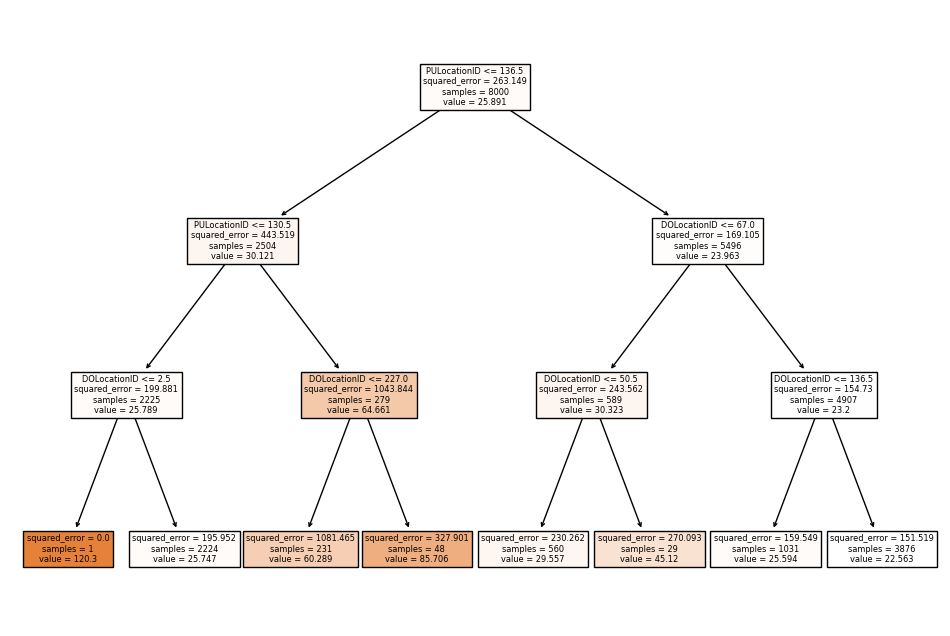

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

X = trip_data[['PULocationID', 'DOLocationID']][:10000]
y = trip_data['total_amount'][:10000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=y)
plt.show()


Find the important feature contributing to the total amount value. Here we use RandomForest

R-squared: 0.6334648071618456
Mean Squared Error: 95.18790837527948


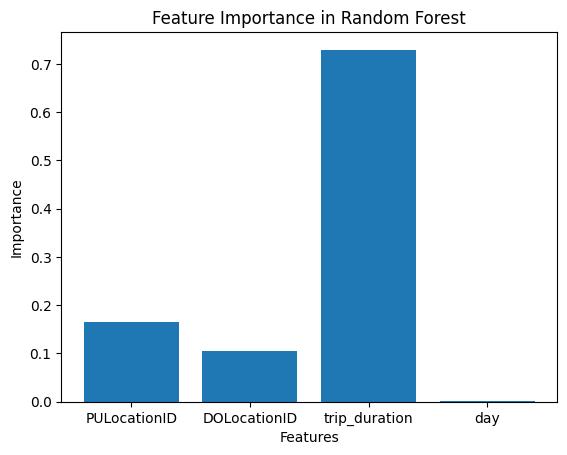

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

X = trip_data[['PULocationID', 'DOLocationID','trip_duration','day']][:10000]
y = trip_data['total_amount'][:10000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

feature_importances = rf_model.feature_importances_
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

From the graph we know the important features are trip_duration, POLocationID and DOLocationID. We visualize again with more features

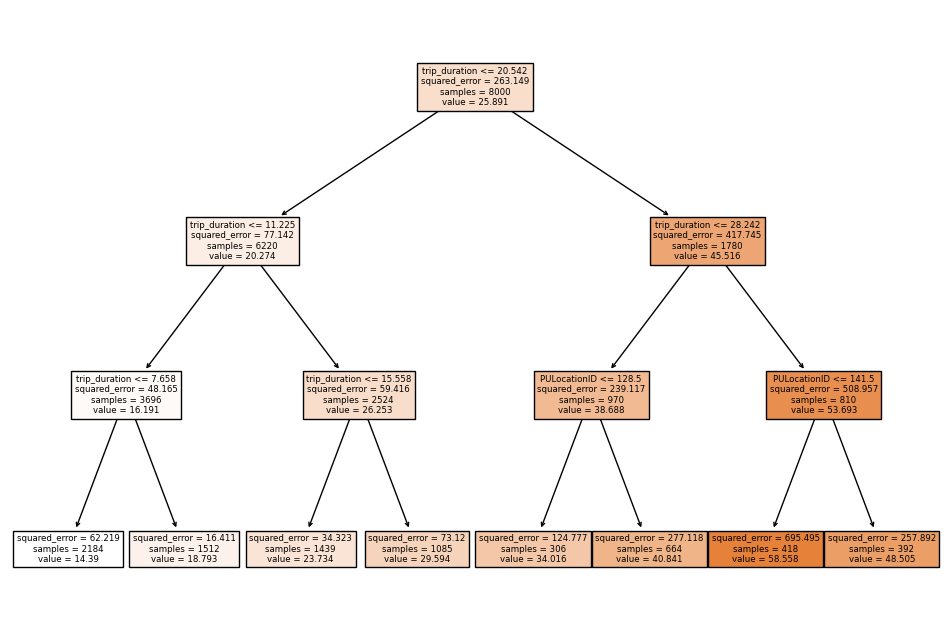

In [11]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=y)
plt.show()

Finding the best n_estimator

In [12]:
estimators = [50, 100, 150, 200]

best_model = None
best_metric = 0  
for est in estimators:
    rf_model = RandomForestRegressor(n_estimators=est, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    if r2 > best_metric:
        best_metric = r2
        depth=est

print(f"Best R-squared: {best_metric}")
print("Best Decision Tree:", depth)

Best R-squared: 0.6345604350726781
Best Decision Tree: 150


From the RandomForest prediction, we get the best value of n_estimators=150 and the best r2=0.6345.  

# Visualizing the data

Visualising the maximum numbers rides with respect to zone.

C:\Users\Katherine\AppData\Local\Temp\ipykernel_84372\2599958699.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = ride_counts.pivot('PUborough', 'DOborough', 'ride_count').fillna(0)


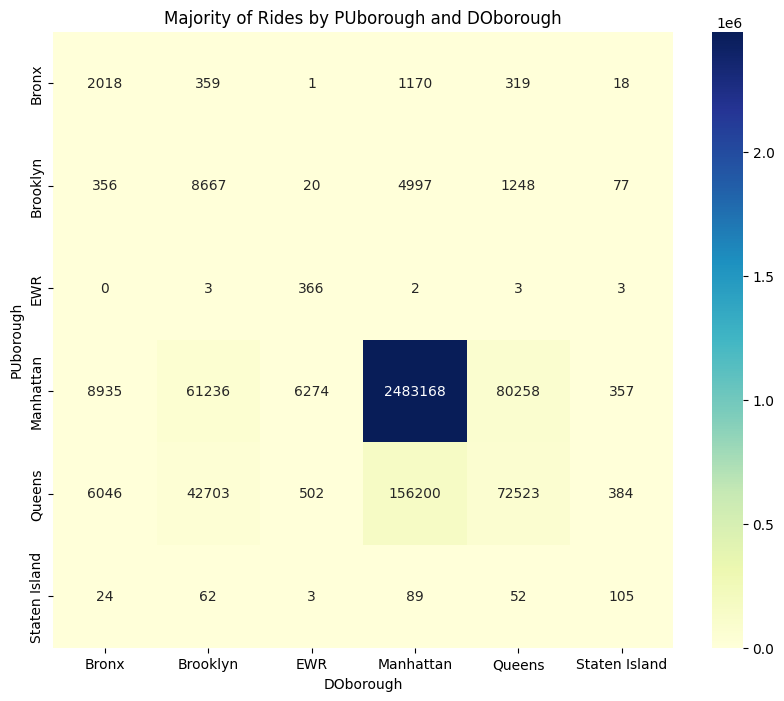

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ride_counts = trip_data.groupby(['PUborough', 'DOborough']).size().reset_index(name='ride_count')

pivot_table = ride_counts.pivot('PUborough', 'DOborough', 'ride_count').fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Majority of Rides by PUborough and DOborough')
plt.xlabel('DOborough')
plt.ylabel('PUborough')
plt.show()

In [14]:
ride_counts.sort_values(by='ride_count', ascending=False).head()

,PUborough,DOborough,ride_count
20,Manhattan,Manhattan,2483168
26,Queens,Manhattan,156200
21,Manhattan,Queens,80258
27,Queens,Queens,72523
18,Manhattan,Brooklyn,61236


Visualizing the highest amount with respect to the area

C:\Users\Katherine\AppData\Local\Temp\ipykernel_84372\2094089845.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = max_total_amount.pivot('PUborough', 'DOborough', 'total_amount')


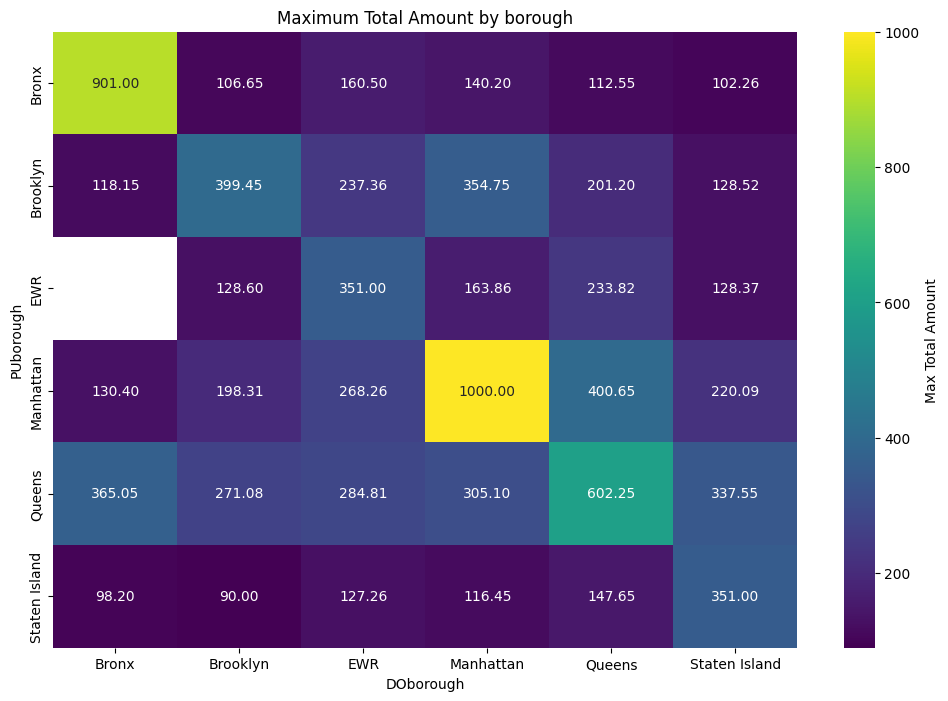

In [15]:
max_total_amount = trip_data.groupby(['PUborough', 'DOborough'])['total_amount'].max().reset_index()

heatmap_data = max_total_amount.pivot('PUborough', 'DOborough', 'total_amount')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Max Total Amount'})
plt.xlabel('DOborough')
plt.ylabel('PUborough')
plt.title('Maximum Total Amount by borough')
plt.show()

From the graph, the maximum amount paid is when the trip is to and from Manhattan, followed by Bronx and Queens. 

In [16]:
max_total_index = trip_data['total_amount'].max()

max_data=trip_data[trip_data['total_amount']==max_total_index]
max_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,PULocationID,PUzone,PUborough,DOLocationID,DOzone,DOborough,trip_duration,day
751153,1,2023-01-09 16:17:32,2023-01-09 16:20:41,1.0,0.0,1000.0,141.0,Lenox Hill West,Manhattan,141.0,Lenox Hill West,Manhattan,3.15,9


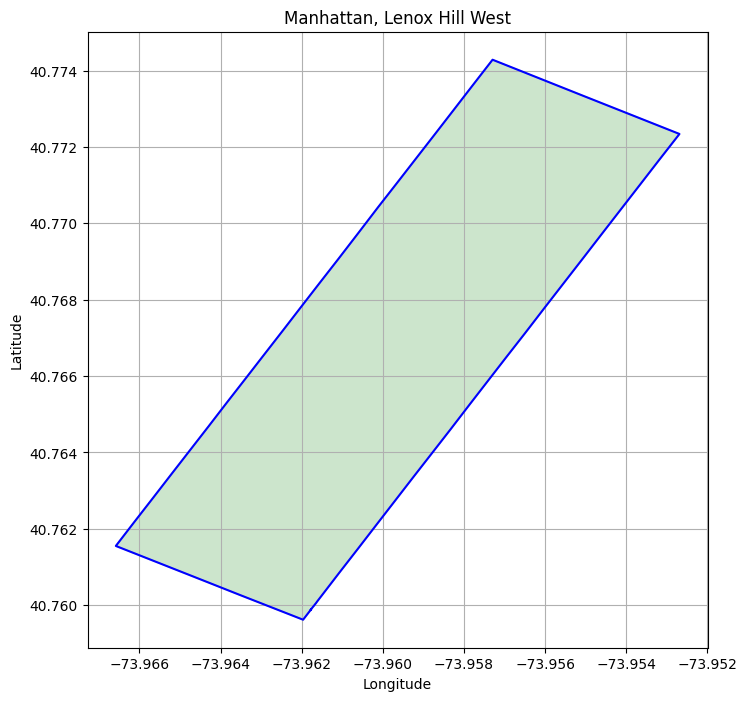

In [17]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

location_id=max_data['PULocationID'].iloc[0]

df = taxi_zones[taxi_zones['LocationID'] == int(location_id)]
wkt_polygon = df['the_geom'].values[0]

coordinates = wkt_polygon.split("(((")[1].split(")))")[0].split(", ")
coordinates = [tuple(map(float, point.split())) for point in coordinates]

polygon = Polygon(coordinates)

x, y = polygon.exterior.xy

plt.figure(figsize=(8, 8))
plt.plot(x, y, color='b')
plt.fill(x, y, alpha=0.2, color='g')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f"{max_data['PUborough'].iloc[0]}, {max_data['PUzone'].iloc[0]}" )
plt.grid()
plt.show()